## Histograms are a great way to visualize individual color components

In [1]:
import cv2
import numpy as np

# We need to import matplotlib to create our histogram plots
from matplotlib import pyplot as plt

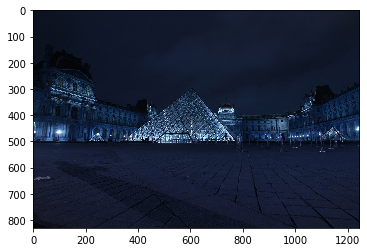

In [4]:
image = cv2.imread('D:/Python/Open CV/Open CV basic/Data/input.jpg')
plt.imshow(image)

In [3]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

In [4]:
histogram

array([[8.5490e+03],
       [3.3290e+03],
       [4.9260e+03],
       [7.3540e+03],
       [9.8940e+03],
       [8.7730e+03],
       [9.1100e+03],
       [9.2700e+03],
       [1.0040e+04],
       [1.1129e+04],
       [1.3307e+04],
       [1.8937e+04],
       [2.6398e+04],
       [3.1545e+04],
       [4.4342e+04],
       [6.5574e+04],
       [8.2161e+04],
       [9.3266e+04],
       [6.0715e+04],
       [5.9003e+04],
       [6.6688e+04],
       [7.2989e+04],
       [6.7060e+04],
       [5.6487e+04],
       [4.1126e+04],
       [3.0128e+04],
       [2.0210e+04],
       [1.2994e+04],
       [8.0340e+03],
       [5.0480e+03],
       [3.4930e+03],
       [2.6830e+03],
       [2.2350e+03],
       [2.0130e+03],
       [1.8220e+03],
       [1.7580e+03],
       [1.6050e+03],
       [1.5410e+03],
       [1.5150e+03],
       [1.4480e+03],
       [1.3970e+03],
       [1.3280e+03],
       [1.2830e+03],
       [1.2230e+03],
       [1.2070e+03],
       [1.2320e+03],
       [1.1710e+03],
       [1.229

In [5]:
image.ravel()

array([12, 18, 31, ..., 19, 24, 39], dtype=uint8)

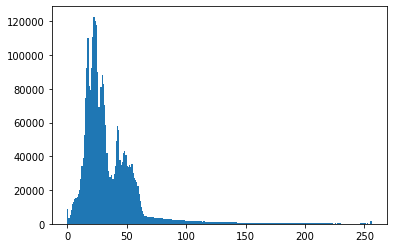

In [6]:
# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

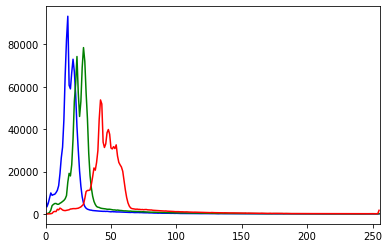

In [7]:
# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
- channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
- histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].

In [8]:
import cv2
import numpy as np

# We need to import matplotlib to create our histogram plots
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
image = cv2.imread('D:/Python/Open CV/Open CV basic/Data/tobago.jpg')

In [10]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

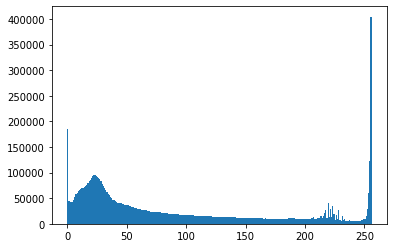

In [11]:
# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256]); plt.show()

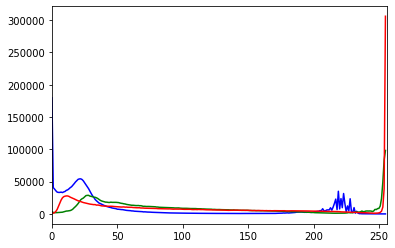

In [12]:
# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

In [13]:
image = cv2.imread('D:/Python/Open CV/Open CV basic/Data/tobago.jpg')
cv2.imshow("Tobago", image) 

cv2.waitKey(0)
cv2.destroyAllWindows()

### Masking

We can mask only certain parts of the image.

In [14]:
rainbow = cv2.imread('D:/Python/Open CV/Open CV basic/Data/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

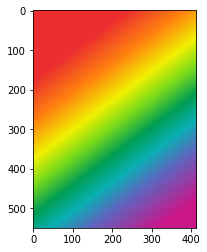

In [15]:
plt.imshow(show_rainbow)

In [16]:
cv2.imshow("im", show_rainbow)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
img = rainbow

In [18]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[300:400, 100:400] = 255

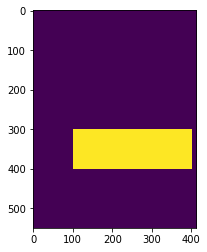

In [19]:
plt.imshow(mask)

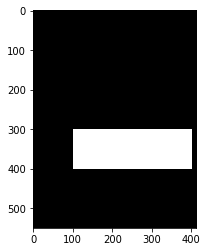

In [20]:
plt.imshow(mask,cmap='gray')

In [21]:
masked_img = cv2.bitwise_and(img,img,mask = mask)
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask = mask)

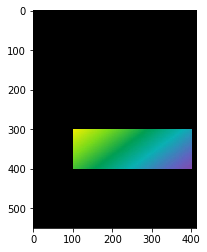

In [22]:
plt.imshow(show_masked_img)

In [23]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_full_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5, 1.0, 'Histogram for RED values of the full image')

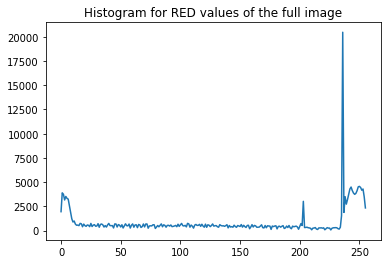

In [24]:
plt.plot(hist_full_values_red)
plt.title('Histogram for RED values of the full image')

Text(0.5, 1.0, 'Histogram for RED values for the Masked Area')

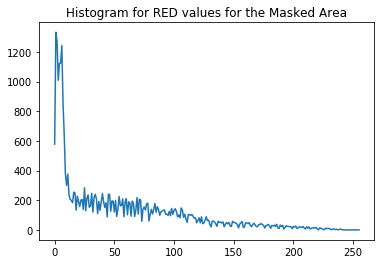

In [25]:
plt.plot(hist_mask_values_red)
plt.title('Histogram for RED values for the Masked Area')